<a href="https://colab.research.google.com/github/GDanila/Sample-DL-Repo/blob/HW1/HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, transforms

from tqdm import tqdm
import numpy as np
from sklearn.manifold import TSNE
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
def get_loader(train, batch_size):
    
    
    dataset = datasets.MNIST('mnist', train=train, download=True,
        transform=transforms.ToTensor())
    
    loader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, shuffle=True)
    
    return loader
    
train = get_loader(True, 64)
val = get_loader(False, 64)

In [ ]:
model = nn.Sequential(nn.Linear(784, 512),
                      nn.ReLU(),
                      nn.Linear(512, 256),                
                      nn.ReLU(),
                      nn.Linear(256, 128),
                      nn.ReLU(),
                      nn.Linear(128, 10),
                      nn.LogSoftmax(dim=1))

In [ ]:
def accuracy(model, val):
    total = 0
    correct = 0
    for X, y in val:
        X = X.view(-1, 784)
        res = model(X)
        res = res.argmax(dim=1)
        total += res.shape[0]
        correct += (res == y).sum().item()
    return correct / total

In [ ]:
optimizer = torch.optim.Adam(model.parameters(), lr=1e-2)
criterion = nn.CrossEntropyLoss()

0.9584166666666667 0.9523
0.9580333333333333 0.9511
0.9675333333333334 0.9597
0.9723 0.9649
0.9733 0.9605
0.97675 0.9658
0.9765833333333334 0.9641
0.9712 0.9594
0.9824666666666667 0.9722
0.9830333333333333 0.9737
0.98405 0.9705
0.98255 0.9706
0.9848833333333333 0.972
0.98395 0.9677
0.9834833333333334 0.9711
0.9840833333333333 0.9671
0.9823833333333334 0.9687
0.9866333333333334 0.9726
0.98415 0.9711
0.98665 0.9711
0.9834333333333334 0.968
0.9875666666666667 0.9708
0.9863666666666666 0.971
0.9847333333333333 0.9675
0.98995 0.9734
0.99095 0.9747
0.9897666666666667 0.9732
0.9776666666666667 0.9614
0.99105 0.9753
0.9877666666666667 0.9712


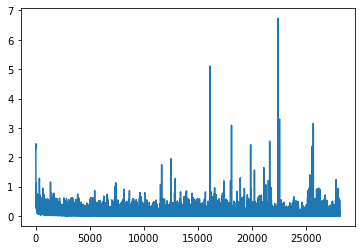

In [ ]:
train_losses = []
accur = []
for epoch in range(30):
    for X, y in train:
        X = X.view(-1, 784)
        
        optimizer.zero_grad()
        
        output = model(X)
        loss = criterion(output, y)
        loss.backward()
        
        train_losses.append(loss.item())
        
        optimizer.step()
    accur.append(accuracy(model, val))
    print(accuracy(model, train), accuracy(model, val))
       
plt.plot(train_losses)
plt.show()

In [ ]:
print(max(accur))

0.9753


In [ ]:
class Autoencoder(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.encode = nn.Sequential(
            nn.Linear(28 * 28,128),
            nn.ReLU(),
            nn.Linear(128,2)
        )
        
        self.decode = nn.Sequential(
            nn.Linear(2,128),
            nn.ReLU(),
            nn.Linear(128,28 * 28),
            nn.Sigmoid()
            )
    
    def forward(self, x):
        return self.decode(self.encode(x))

model = Autoencoder()

criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters())

In [ ]:
for epoch in range(10):
    train_loss = 0
    for data, _ in train:
        data = data.view(-1, 784)
        optimizer.zero_grad()
        
        reconstructed = model(data)
        loss = criterion(data, reconstructed)
        
        loss.backward()

        train_loss += loss.item()
        optimizer.step()

    print('epoch %d, loss %.4f' % (epoch, train_loss / len(train)))

epoch 0, loss 0.0575
epoch 1, loss 0.0492
epoch 2, loss 0.0474
epoch 3, loss 0.0464
epoch 4, loss 0.0456
epoch 5, loss 0.0448
epoch 6, loss 0.0442
epoch 7, loss 0.0437
epoch 8, loss 0.0433
epoch 9, loss 0.0430


# № 2

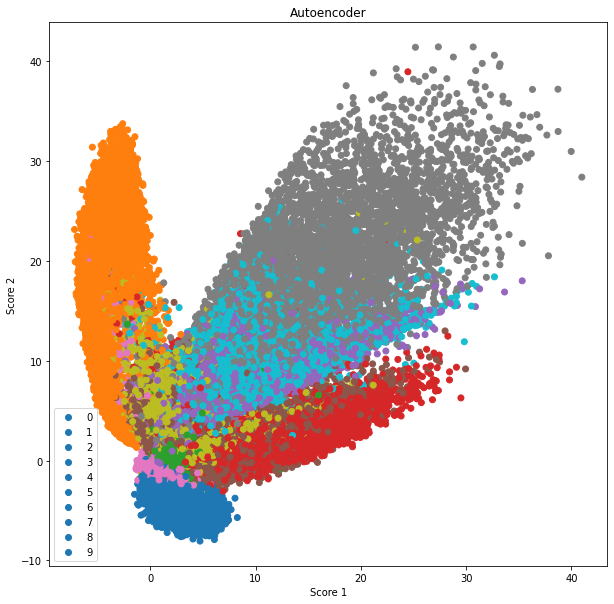

In [ ]:
plt.rcParams["figure.figsize"] = (10,10)
for i, (x, y) in enumerate(train):
    z = model.encode(x.view(-1, 784))
    z = z.detach().numpy()
    plt.scatter(z[:, 0], z[:, 1], c=y, cmap='tab10')
plt.title("Autoencoder")
plt.legend(range(10))
plt.xlabel("Score 1")
plt.ylabel("Score 2");

# № 3

In [ ]:
from matplotlib import animation
from matplotlib.animation import FuncAnimation
from IPython.display import HTML, display

In [ ]:
def get(x):
    return train.dataset[x][0].view(1, 784)

def imshow(img):
    pic = img.numpy().astype('float')
    plt.axis('off')
    return plt.imshow(pic, cmap='Greys', animated=True)

def morph(inputs, steps, delay):
    # перегоняем в латентное пространство все картинки на входе
    latent = [model.encode(get(k)).data for k in inputs]
    fig = plt.figure()
    images = []
    for a, b in zip(latent, latent[1:] + [latent[0]]):
        for t in numpy.linspace(0, 1, steps):
            # получаем проинтерполированную точку
            c = a*(1-t)+b*t
            # ...и декодируем её в изображение
            morphed = model.decode(c).data
            morphed = morphed.view(28, 28)
            images.append([imshow(morphed)])
    
    ani = animation.ArtistAnimation(fig, images, interval=delay)

    display(HTML(ani.to_html5_video()))

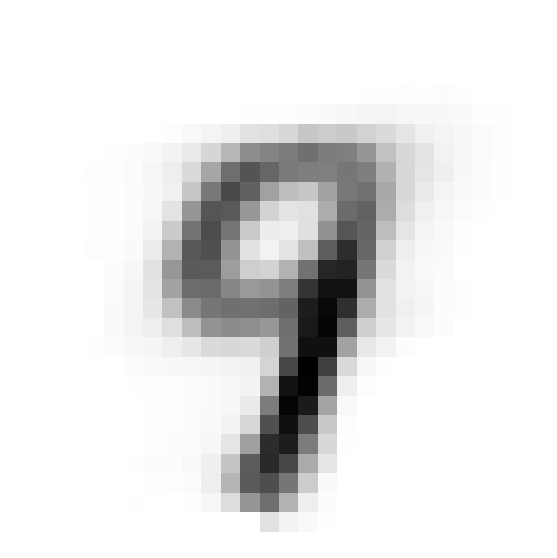

In [ ]:
morph(numpy.random.randint(0, len(train.dataset), 30), 20, 30)